In [1]:
%matplotlib widget

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path
BASE_DIR = Path("")

FILES = [
    #"flugzeug_bq_s16384_bs8192_bi64_wt50.csv",
    #"flugzeug_bq_s16384_bs2048_bi64_wt50.csv",
    #"flugzeug_bq_s16384_bs1024_bi64_wt50.csv",
    #"flugzeug_bq_s16384_bs32_bi64_wt50.csv",
    #"flugzeug_bq_s16384_bs8_bi64_wt50.csv",
    #"flugzeug_bq_s16384_bs8192_bi64_wt200.csv",
    #"flugzeug_bq_s16384_bs8192_bi64_wt500.csv",
    "data_eq_8192_16384_50.csv",
    "data_bq_16384_8192_64_50.csv",
    "data_ffq_1024_16.csv",
]

def load_results(path: str):
    df = pd.read_csv(BASE_DIR.joinpath(path))

    df["RX_TIME"] = df["RX_End"] - df["RX_Start"]
    df["TX_TIME"] = df["TX_End"] - df["TX_Start"]
    df["LATENCY"] = df["RX_End"] - df["TX_End"]

    return df

results = [(load_results(f), f) for f in FILES]

for res in results:
    print(f"Mean for {res[1]}:\n{res[0][["RX_TIME", "TX_TIME"]].mean()}")
    print(f"Median for {res[1]}:\n{res[0][["RX_TIME", "TX_TIME"]].median()}")
    print(f"Std. Deriv. for {res[1]}:\n{res[0][["RX_TIME", "TX_TIME"]].std()}")
    print("---------------------------------------------")


Mean for data_eq_8192_16384_50.csv:
RX_TIME    21.468276
TX_TIME    37.147654
dtype: float64
Median for data_eq_8192_16384_50.csv:
RX_TIME    18.0
TX_TIME    34.0
dtype: float64
Std. Deriv. for data_eq_8192_16384_50.csv:
RX_TIME    15.322322
TX_TIME    17.957130
dtype: float64
---------------------------------------------
Mean for data_bq_16384_8192_64_50.csv:
RX_TIME    25.769955
TX_TIME    38.755530
dtype: float64
Median for data_bq_16384_8192_64_50.csv:
RX_TIME    20.0
TX_TIME    35.0
dtype: float64
Std. Deriv. for data_bq_16384_8192_64_50.csv:
RX_TIME    26.748347
TX_TIME    16.816298
dtype: float64
---------------------------------------------
Mean for data_ffq_1024_16.csv:
RX_TIME    31.652339
TX_TIME    35.028653
dtype: float64
Median for data_ffq_1024_16.csv:
RX_TIME    14.0
TX_TIME    28.0
dtype: float64
Std. Deriv. for data_ffq_1024_16.csv:
RX_TIME     38.550138
TX_TIME    140.223172
dtype: float64
---------------------------------------------


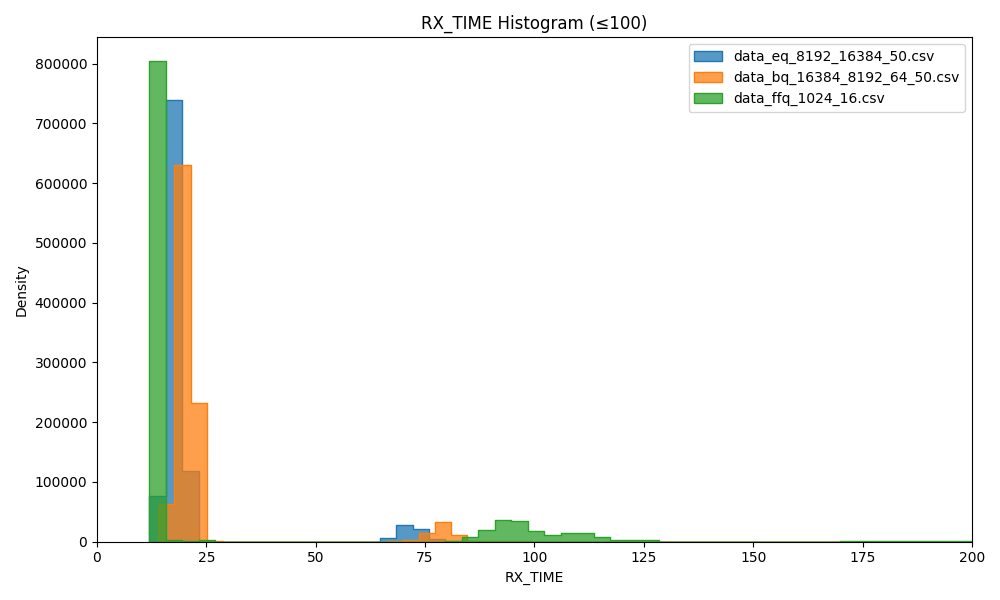

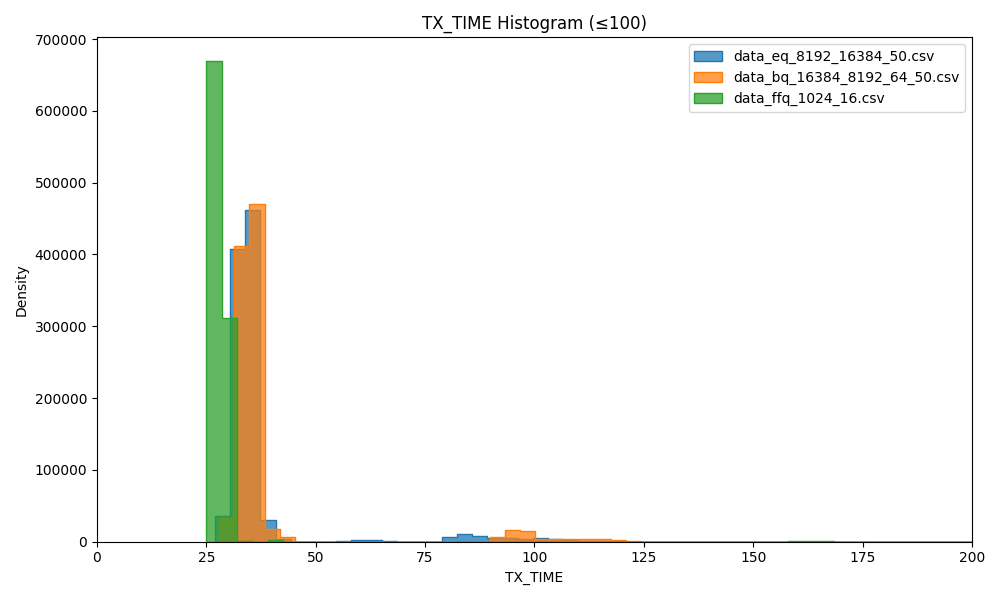

In [4]:
import seaborn as sns

# Plot RX_TIME
plt.figure(figsize=(10, 6))
for df, filename in results:
    filtered_rx = df["RX_TIME"][df["RX_TIME"] <= 200]
    sns.histplot(filtered_rx, bins=50, label=filename, element="step")
plt.title("RX_TIME Histogram (≤100)")
plt.xlabel("RX_TIME")
plt.ylabel("Density")
plt.xlim(0, 200)
plt.legend()
plt.tight_layout()
plt.show()

# Plot TX_TIME
plt.figure(figsize=(10, 6))
for df, filename in results:
    filtered_tx = df["TX_TIME"][df["TX_TIME"] <= 200]
    sns.histplot(filtered_tx, bins=50, label=filename, element="step")
plt.title("TX_TIME Histogram (≤100)")
plt.xlabel("TX_TIME")
plt.ylabel("Density")
plt.xlim(0, 200)
plt.legend()
plt.tight_layout()
plt.show()
